# InfluxDB MDF Bridge.

- https://twitter.com/InfluxDB
- https://github.com/influxdata
- https://en.wikipedia.org/wiki/InfluxDB

> InfluxDB is an **open-source time series database** (TSDB) developed by InfluxData. It is written in Go and **optimized for fast, high-availability storage and retrieval of time series data**  in fields such as operations monitoring, application metrics, Internet of Things sensor data, and real-time analytics. It also has support for processing data from Graphite. [emphasis added]

Installed the "TICK" stack for Ubuntu 18.04.02 LTS:
```
#!/usr/bin/env bash

wget https://dl.influxdata.com/influxdb/releases/influxdb_1.7.4_amd64.deb
sudo dpkg -i influxdb_1.7.4_amd64.deb

wget https://dl.influxdata.com/chronograf/releases/chronograf_1.7.8_amd64.deb
sudo dpkg -i chronograf_1.7.8_amd64.deb

wget https://dl.influxdata.com/kapacitor/releases/kapacitor_1.5.2_amd64.deb
sudo dpkg -i kapacitor_1.5.2_amd64.deb
```

In [8]:
import influxdb
import asammdf
import py

In [9]:
data_file = 'baseline.mf4'

In [10]:
data_file_ = py.path.local(
        path=data_file,
    )
    
mdf = asammdf.MDF(data_file)

In [11]:
data_file_.computehash(
        hashtype="sha256",
    )

'1eb279a13efa6e9fd1399a50a07d8c91e0d897e14d3bf0b279a5b353a71a83c2'

# InfluxDB Python Examples

https://influxdb-python.readthedocs.io/en/latest/examples.html

In [11]:
def main(host='localhost', port=8086):
    """Instantiate a connection to the InfluxDB."""
    user = ''
    password = ''
    dbname = 'example'
    dbuser = ''
    dbuser_password = ''
    query = 'select value from cpu_load_short;'
    json_body = [
        {
            "measurement": "cpu_load_short",
            "tags": {
                "host": "server01",
                "region": "us-west"
            },
            "time": "2009-11-10T23:00:00Z",
            "fields": {
                "Float_value": 0.64,
                "Int_value": 3,
                "String_value": "Text",
                "Bool_value": True
            }
        }
    ]

    client = InfluxDBClient(host, port, user, password, dbname)

    print("Create database: " + dbname)
    client.create_database(dbname)

    print("Create a retention policy")
    client.create_retention_policy('awesome_policy', '3d', 3, default=True)

    print("Switch user: " + dbuser)
    client.switch_user(dbuser, dbuser_password)

    print("Write points: {0}".format(json_body))
    client.write_points(json_body)

    print("Querying data: " + query)
    result = client.query(query)

    print("Result: {0}".format(result))

    print("Switch user: " + user)
    client.switch_user(user, password)

    print("Drop database: " + dbname)
    client.drop_database(dbname)

https://www.influxdata.com/blog/getting-started-python-influxdb/

In [20]:
from influxdb import InfluxDBClient

In [21]:
client = InfluxDBClient(host='localhost', port=8086)

In [22]:
client.get_list_database()

[{'name': '_internal'}, {'name': 'pyexample'}]

In [23]:
client.create_database('pyexample')
client.switch_database('pyexample')

In [12]:
mdf.channels_db.keys()

dict_keys(['time', 'sine_t1En1', 'sine_t1En2', 'sine_t1En3', 'sine_t1En4', 'sine_t1En5', 'cos_t1En1', 'cos_t1En2', 'cos_t1En3', 'cos_t1En4', 'cos_t1En5', 'square_t1En1', 'square_t1En2', 'square_t1En3', 'square_t1En4', 'square_t1En5', 'sawtooth_t1En1', 'sawtooth_t1En2', 'sawtooth_t1En3', 'sawtooth_t1En4', 'sawtooth_t1En5', 'triangle_t1En1', 'triangle_t1En2', 'triangle_t1En3', 'triangle_t1En4', 'triangle_t1En5'])

In [24]:
df = mdf.to_dataframe()

In [26]:
df

,sine_t1En1,sine_t1En2,sine_t1En3,sine_t1En4,sine_t1En5,cos_t1En1,cos_t1En2,cos_t1En3,cos_t1En4,cos_t1En5,...,sawtooth_t1En1,sawtooth_t1En2,sawtooth_t1En3,sawtooth_t1En4,sawtooth_t1En5,triangle_t1En1,triangle_t1En2,triangle_t1En3,triangle_t1En4,triangle_t1En5
time,,,,,,,,,,,,,,,,,,,,,
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
0.000010,0.000059,0.000063,0.000063,0.000063,0.000063,0.000059,0.000063,0.000063,0.000063,0.000063,...,-0.999980,-0.999980,-0.999980,-0.999980,-0.999980,-0.999960,-0.999960,-0.999960,-0.999960,-0.999960
0.000020,0.000118,0.000126,0.000126,0.000126,0.000126,0.000118,0.000126,0.000126,0.000126,0.000126,...,-0.999960,-0.999960,-0.999960,-0.999960,-0.999960,-0.999920,-0.999920,-0.999920,-0.999920,-0.999920
0.000030,0.000176,0.000188,0.000188,0.000188,0.000188,0.000176,0.000188,0.000188,0.000188,0.000188,...,-0.999940,-0.999940,-0.999940,-0.999940,-0.999940,-0.999880,-0.999880,-0.999880,-0.999880,-0.999880
0.000040,0.000235,0.000251,0.000251,0.000251,0.000251,0.000235,0.000251,0.000251,0.000251,0.000251,...,-0.999920,-0.999920,-0.999920,-0.999920,-0.999920,-0.999840,-0.999840,-0.999840,-0.999840,-0.999840
0.000050,0.000294,0.000314,0.000314,0.000314,0.000314,0.000294,0.000314,0.000314,0.000314,0.000314,...,-0.999900,-0.999900,-0.999900,-0.999900,-0.999900,-0.999800,-0.999800,-0.999800,-0.999800,-0.999800
0.000060,0.000353,0.000377,0.000377,0.000377,0.000377,0.000353,0.000377,0.000377,0.000377,0.000377,...,-0.999880,-0.999880,-0.999880,-0.999880,-0.999880,-0.999760,-0.999760,-0.999760,-0.999760,-0.999760
0.000070,0.000411,0.000440,0.000440,0.000440,0.000440,0.000411,0.000440,0.000440,0.000440,0.000440,...,-0.999860,-0.999860,-0.999860,-0.999860,-0.999860,-0.999720,-0.999720,-0.999720,-0.999720,-0.999720
0.000080,0.000470,0.000502,0.000503,0.000503,0.000503,0.000470,0.000502,0.000503,0.000503,0.000503,...,-0.999840,-0.999840,-0.999840,-0.999840,-0.999840,-0.999680,-0.999680,-0.999680,-0.999680,-0.999680


In [35]:
type(df)

pandas.core.frame.DataFrame

In [28]:
client.write_points?

In [39]:
%matplotlib inline

In [45]:
df.sawtooth_t1En5.get()

TypeError: get() missing 1 required positional argument: 'key'

In [36]:
client.create_database('baseline')
client.switch_database('baseline')
client.write_points(points=df, time_precision="u", database='baseline', protocol='json')

AttributeError: 'str' object has no attribute 'get'

,sine_t1En1,sine_t1En2,sine_t1En3,sine_t1En4,sine_t1En5,cos_t1En1,cos_t1En2,cos_t1En3,cos_t1En4,cos_t1En5,...,sawtooth_t1En1,sawtooth_t1En2,sawtooth_t1En3,sawtooth_t1En4,sawtooth_t1En5,triangle_t1En1,triangle_t1En2,triangle_t1En3,triangle_t1En4,triangle_t1En5
time,,,,,,,,,,,,,,,,,,,,,
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
0.000010,0.000059,0.000063,0.000063,0.000063,0.000063,0.000059,0.000063,0.000063,0.000063,0.000063,...,-0.999980,-0.999980,-0.999980,-0.999980,-0.999980,-0.999960,-0.999960,-0.999960,-0.999960,-0.999960
0.000020,0.000118,0.000126,0.000126,0.000126,0.000126,0.000118,0.000126,0.000126,0.000126,0.000126,...,-0.999960,-0.999960,-0.999960,-0.999960,-0.999960,-0.999920,-0.999920,-0.999920,-0.999920,-0.999920
0.000030,0.000176,0.000188,0.000188,0.000188,0.000188,0.000176,0.000188,0.000188,0.000188,0.000188,...,-0.999940,-0.999940,-0.999940,-0.999940,-0.999940,-0.999880,-0.999880,-0.999880,-0.999880,-0.999880
0.000040,0.000235,0.000251,0.000251,0.000251,0.000251,0.000235,0.000251,0.000251,0.000251,0.000251,...,-0.999920,-0.999920,-0.999920,-0.999920,-0.999920,-0.999840,-0.999840,-0.999840,-0.999840,-0.999840
0.000050,0.000294,0.000314,0.000314,0.000314,0.000314,0.000294,0.000314,0.000314,0.000314,0.000314,...,-0.999900,-0.999900,-0.999900,-0.999900,-0.999900,-0.999800,-0.999800,-0.999800,-0.999800,-0.999800
0.000060,0.000353,0.000377,0.000377,0.000377,0.000377,0.000353,0.000377,0.000377,0.000377,0.000377,...,-0.999880,-0.999880,-0.999880,-0.999880,-0.999880,-0.999760,-0.999760,-0.999760,-0.999760,-0.999760
0.000070,0.000411,0.000440,0.000440,0.000440,0.000440,0.000411,0.000440,0.000440,0.000440,0.000440,...,-0.999860,-0.999860,-0.999860,-0.999860,-0.999860,-0.999720,-0.999720,-0.999720,-0.999720,-0.999720
0.000080,0.000470,0.000502,0.000503,0.000503,0.000503,0.000470,0.000502,0.000503,0.000503,0.000503,...,-0.999840,-0.999840,-0.999840,-0.999840,-0.999840,-0.999680,-0.999680,-0.999680,-0.999680,-0.999680


In [46]:
from influxdb import DataFrameClient

In [ ]:
client = DataFrameClient()
client.create_database('baseline')
client.switch_database('baseline')

In [53]:
client.write_points?

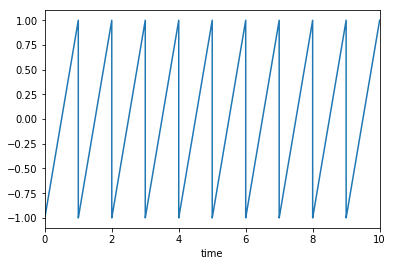

In [57]:
df.sawtooth_t1En4.

In [60]:
df.timetuple

In [61]:
client.write_points(dataframe=df, tag_columns=["time"], measurement="baseline", time_precision="u", database='baseline', protocol='json')

TypeError: Must be DataFrame with DatetimeIndex or PeriodIndex.

In [62]:
import pandas as pd

In [56]:
pd.d

In [ ]:
mean

In [64]:
pd.Period()

<function pandas.core.indexes.base.Index.to_series(self, index=None, name=None)>

In [ ]:
df.timetuple